In [1]:
# !pip install pandas

In [2]:
# Joblib is used to save model

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap
import warnings

warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight") ## << Optional >>

<img src="Perceptron.png" width="600" height="600">

In [4]:

# Creating a perceptorn classs from stratch
class Perceptron:
    
    def __init__(self, learning_rate: float=None, epochs: int=None):
        
        self.weights = np.random.randn(3) * 1e-4 #Small random weights
        training  = (learning_rate is not None) and (epochs is not None)
        
        if training:
            print(f"Initial weights before training: \n{self.weights}")
        self.learning_rate  = learning_rate
        self.epochs = epochs
    
    # Starting with _ (underscore) means it is an internal method 
    def _zee_outcome(self, inputs, weights):
        try:
            return np.dot(inputs, weights)
        
        except Exception as e:
            print(e)
    
    # step function
    def activation_function(self, z):
        try:
            return np.where(z > 0, 1, 0)
            
        except Exception as e:
            print(e)
    
    # X is inputs y is labels
    def fit(self, X, y):
        try:
            self.X = X
            self.y = y

            # Adding bias with X
            X_with_bias = np.c_[self.X, - np.ones((len(self.X), 1))]
            print(f"X with bias is :\n{X_with_bias}")
            
            for epoch in range(self.epochs):
                print("--"*10)
                print(f"for epoch --> {epoch}")
                print("--"*10)
                
                z = self._zee_outcome(X_with_bias, self.weights)
                y_hat = self.activation_function(z)
                print(f"Predicted value after forwar propagation is: \n{y_hat}")
                
                self.error = self.y - y_hat
                print(f"error: \n{self.error}")
                
                # Weight update rule 
                self.weights = self.weights + self.learning_rate * np.dot(X_with_bias.T, self.error)
                print(f"Updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights} ")
                print("##"*10)
        
        except Exception as e:
            print(e)
    
    def predict(self, test_inputs):
        try:
            X_with_bias = np.c_[test_inputs, - np.ones((len(test_inputs), 1))]
            z = self._zee_outcome(X_with_bias, self.weights)
            return self.activation_function(z)
            
        except Exception as e:
            print(e)
    
    def total_loss(self):
        try:
            total_loss = np.sum(self.error)
            print(f"\nTotal loss: {total_loss}\n")
            return total_loss
            
        except Exception as e:
            print(e)
    
    # Starting with _ (underscore) means it is an internal method
    def _create_dir_return_path(self, model_dir, file_name):
        try:
            os.makedirs(model_dir, exist_ok=True)
            return os.path.join(model_dir, file_name)
        
        except Exception as e:
            print(e)
    
    def model_store(self, file_name, model_dir=None):
        try:
            if model_dir is not None:
                model_file_path = self._create_dir_return_path(model_dir, file_name)
                joblib.dump(self, model_file_path)
            
            else:
                model_file_path = self._create_dir_return_path("Model", file_name)
                joblib.dump(self, model_file_path)
                     
        except Exception as e:
            print(e)
    
    def model_load(self, file_path):
        try:
            return joblib.load(file_path)
        
        except Exception as e:
            print(e)
    

### For AND Gate 

In [5]:
AND = {
    "x1" : [0,0,1,1],
    "x2" : [0,1,0,1],
    "y" : [0,0,0,1]
}

In [6]:
df_and = pd.DataFrame(AND)

In [7]:
df_and

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [8]:
# Creating a function to segrigate data
def prepare_data(df,target_column="y"):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    return X,y

In [9]:
X, y = prepare_data(df_and)

In [10]:
# learning Rate (eta) 0 to 1
ETA = 0.1
EPOCHS = 10

model = Perceptron(learning_rate=ETA, epochs=EPOCHS)

Initial weights before training: 
[-2.99822932e-06  1.50929769e-04 -7.58616167e-06]


In [11]:
model.fit(X,y)

X with bias is :
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch --> 0
--------------------
Predicted value after forwar propagation is: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights after epoch: 1/10: 
[-0.100003   -0.09984907  0.29999241] 
####################
--------------------
for epoch --> 1
--------------------
Predicted value after forwar propagation is: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epoch: 2/10: 
[-2.99822932e-06  1.50929769e-04  1.99992414e-01] 
####################
--------------------
for epoch --> 2
--------------------
Predicted value after forwar propagation is: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epoch: 3/10: 
[0.099997   0.10015093 0.09999241] 
####################
--------------------
for epoch --> 3
--------------------
Predicted value after forwar propagation is: 
[0 1 

In [12]:
# _ Place_holder is a dummy variable
_ = model.total_loss()
_


Total loss: 0



0

In [13]:
model.model_store(file_name="and_model.pkl")

### For OR Gate

In [14]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,1]
}

df_or = pd.DataFrame(OR)

df_or

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [15]:
X, y = prepare_data(df_or)

ETA = 0.1
EPOCHS = 10

model = Perceptron(learning_rate=ETA, epochs=EPOCHS)
model.fit(X,y)
_ = model.total_loss()

Initial weights before training: 
[-7.52032852e-06  2.36250640e-05 -2.41829074e-06]
X with bias is :
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch --> 0
--------------------
Predicted value after forwar propagation is: 
[1 1 0 1]
error: 
0   -1
1    0
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch: 1/10: 
[ 9.99924797e-02  2.36250640e-05 -2.41829074e-06] 
####################
--------------------
for epoch --> 1
--------------------
Predicted value after forwar propagation is: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 2/10: 
[9.99924797e-02 2.36250640e-05 9.99975817e-02] 
####################
--------------------
for epoch --> 2
--------------------
Predicted value after forwar propagation is: 
[0 0 0 1]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch: 3/10: 
[ 0.19999248  0.10002363 -0.10000242] 
####################
-------------

In [16]:
model.model_store(file_name="or_model.pkl")

### For XOR Gate 

In [17]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,0]
}

df_xor = pd.DataFrame(XOR)

df_xor

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [18]:
X, y = prepare_data(df_xor)

ETA = 0.1
EPOCHS = 10

model = Perceptron(learning_rate=ETA, epochs=EPOCHS)
model.fit(X,y)
_ = model.total_loss()

Initial weights before training: 
[4.53546366e-05 1.14748060e-05 5.94426507e-05]
X with bias is :
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch --> 0
--------------------
Predicted value after forwar propagation is: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch: 1/10: 
[ 0.10004535  0.10001147 -0.19994056] 
####################
--------------------
for epoch --> 1
--------------------
Predicted value after forwar propagation is: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights after epoch: 2/10: 
[4.53546366e-05 1.14748060e-05 5.94426507e-05] 
####################
--------------------
for epoch --> 2
--------------------
Predicted value after forwar propagation is: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch: 3/10: 
[ 0.10004535  0.10001147 -0.19994056] 
####################
--------------------
for epo

* loss is not decreasing beacuse perceptron only works on linearly sepreable data

In [19]:
model.model_store(file_name="xor_model.pkl")

In [20]:
model_and = Perceptron().model_load(file_path="Model/and_model.pkl")

In [27]:
model_or = Perceptron().model_load(file_path="Model/or_model.pkl")

In [23]:
model_and.predict(test_inputs=[[1,0]])

array([0])

In [30]:
def save_plot(df, model, file_name="plot.png", plot_dir="plots"):
    
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # As an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2, = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                               )
        
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
    
    X, y = prepare_data(df)
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
        
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, file_name)
    plt.savefig(plot_path)

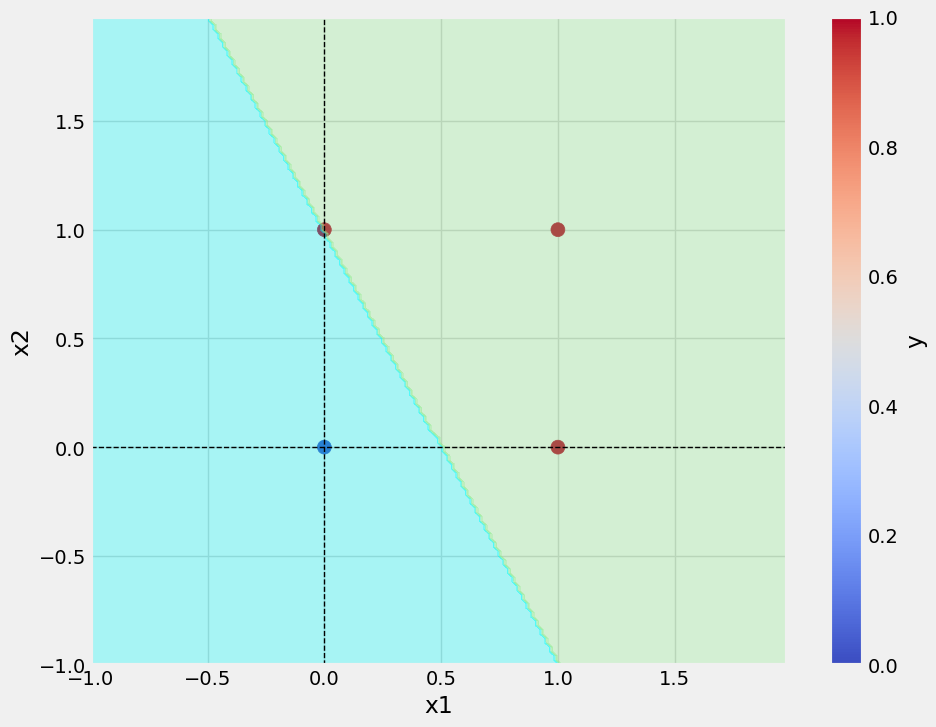

In [31]:
save_plot(df_or, model_or, file_name="or.png")

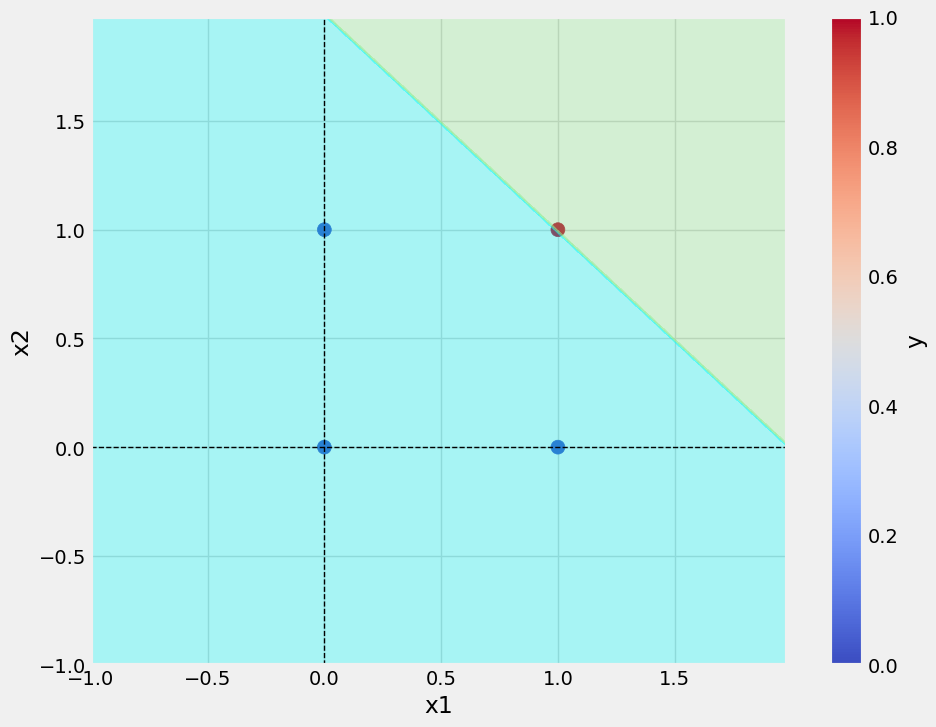

In [33]:
save_plot(df_and, model_and, file_name="and.png")

In [34]:
model_xor = Perceptron().model_load(file_path="Model/xor_model.pkl")

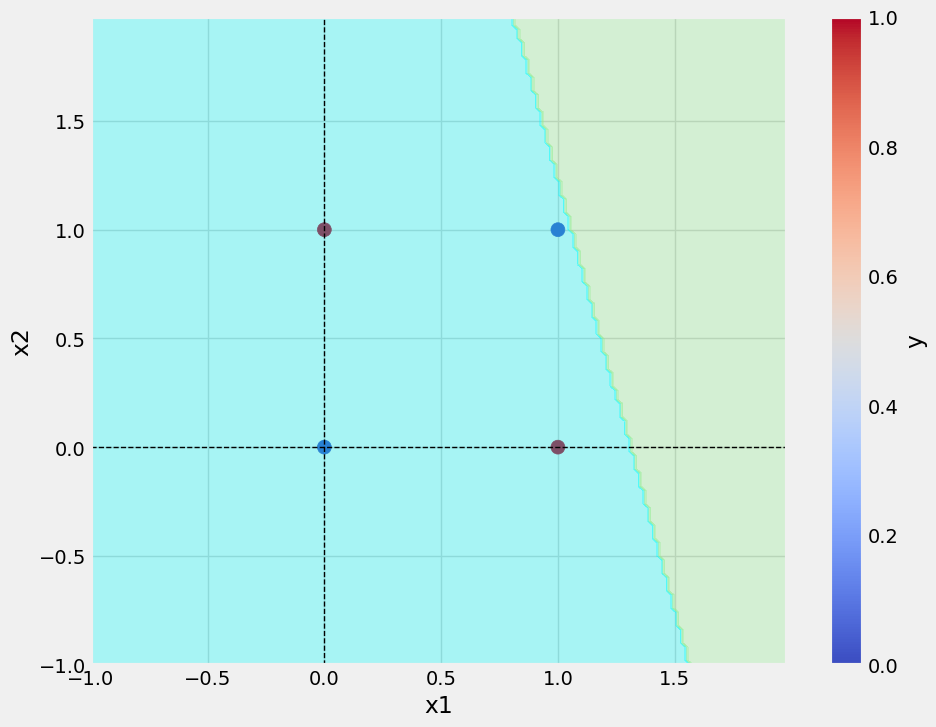

In [37]:
save_plot(df_xor, model_xor, file_name="xor.png")